<a href="https://colab.research.google.com/github/vinayakareddy/Headline-Classification/blob/master/Headline_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from google.colab import files
import io

%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = "/content/drive/My Drive/Colab Notebooks/abcnews-date-text.csv"
data = pd.read_csv(path,error_bad_lines=False,usecols =["headline_text"])
data.head()

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


In [0]:
data.describe()

,headline_text
count,1103663
unique,1076219
top,abc sport
freq,755


In [0]:
#checking for null rows
data.isnull().sum()

headline_text    0
dtype: int64

In [0]:
#3check for duplicate headlines
data.headline_text.value_counts()

abc sport                                                         755
abc weather                                                       736
national rural news                                               648
abc business news and market analysis                             588
abc entertainment                                                 315
closer am1                                                        315
closer pm1                                                        307
abc entertainment news                                            240
kohler report                                                     206
closer pm                                                         200
abc business news                                                 186
nrl live streaming updates                                        158
abc business                                                      145
interview michael clarke                                          124
countrywide         

In [0]:
#removing duplicate values
data = data.drop_duplicates('headline_text')
data.headline_text.value_counts()

philippines gun culture fuelled by civilians                       1
the victorian farmers federation is battling to                    1
new footage released of belgium bombings suspect                   1
tas half time hemp production gains international                  1
jim bell from fesa speaks to journalists about the                 1
energy company blamed for bushfire                                 1
sunlander rape accused remanded in custody                         1
major dairy company in voluntary administration                    1
plans to close lenswood agricultural centre                        1
businesses to get rights and obligations outlined                  1
carlton leave fightback too late                                   1
lands minister says wa pastoral lease system is clunky             1
peabody energy to cut aust production                              1
tassie huskies to race                                             1
even primary school students suffe

**NLP**

Preparing data for vectorizaion However, when doing natural language processing, words must be converted into vectors that machine learning algorithms can make use of. If your goal is to do machine learning on text data, like movie reviews or tweets or anything else, you need to convert the text data into numbers. This process is sometimes referred to as “embedding” or “vectorization”.

In terms of vectorization, it is important to remember that it isn’t merely turning a single word into a single number. While words can be transformed into numbers, an entire document can be translated into a vector. Not only can a vector have more than one dimension, but with text data vectors are usually high-dimensional. This is because each dimension of your feature data will correspond to a word, and the language in the documents you are examining will have thousands of words.

**TF-IDF**

In information retrieval, tf–idf or TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling. The tf-idf value increases proportionally to the number of times a word appears in the document and is offset by the frequency of the word in the corpus, which helps to adjust for the fact that some words appear more frequently in general. Nowadays, tf-idf is one of the most popular term-weighting schemes; 83% of text-based recommender systems in the domain of digital libraries use tf-idf.

Variations of the tf–idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query. tf–idf can be successfully used for stop-words filtering in various subject fields, including text summarization and classification.

One of the simplest ranking functions is computed by summing the tf–idf for each query term; many more sophisticated ranking functions are variants of this simple model.

In [0]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
desc = data.headline_text
vectorizer = TfidfVectorizer(stop_words = stop_words)
#convreting words tonumbers
X = vectorizer.fit_transform(desc)
#X.dtype
#print(X)

In [0]:
word_features = vectorizer.get_feature_names()
print(len(word_features))
print(word_features[5000:5100])

96354
['academia', 'academic', 'academics', 'academies', 'academy', 'academys', 'acai', 'acapulco', 'acars', 'acason', 'acasuso', 'acb', 'acbf', 'acc', 'acca', 'accan', 'accc', 'acccc', 'acccs', 'acccused', 'acce', 'accedes', 'accelerant', 'accelerants', 'accelerate', 'accelerated', 'accelerates', 'accelerating', 'acceleration', 'accelerator', 'accen', 'accent', 'accents', 'accentuate', 'accentuates', 'accentuating', 'accenture', 'accept', 'acceptability', 'acceptable', 'acceptably', 'acceptance', 'acceptances', 'accepted', 'accepting', 'acceptor', 'acceptors', 'accepts', 'accerate', 'acces', 'access', 'accessary', 'accessed', 'accesses', 'accessibility', 'accessible', 'accessing', 'accessories', 'accessory', 'accesss', 'acci', 'accid', 'accide', 'acciden', 'accidenatlly', 'accidenbt', 'accident', 'accidental', 'accidentally', 'accidently', 'accidents', 'acciona', 'accis', 'acclaim', 'acclaimed', 'acclamation', 'acclimatise', 'acco', 'accolade', 'accolades', 'accom', 'accomm', 'accommo

**Stemming:**

Stemming is the process of reducing a word into its stem, i.e. its root form. The root form is not necessarily a word by itself, but it can be used to generate words by concatenating the right suffix. For example, the words fish, fishes and fishing all stem into fish, which is a correct word. On the other side, the words study, studies and studying stems into studi, which is not an English word.

**lemmatizing:**

compound splitting, filtering based on part-of-speech, etc. are not included in the scikit-learn codebase, but can be added by customizing either the tokenizer or the analyzer. Here’s a CountVectorizer with a tokenizer and lemmatizer using NLTK:

**Tokenizing**

Tokenization is breaking the sentence into words and punctuation,

In [0]:
stemmer = SnowballStemmer('english')

#to remove all characters except alphabets
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

#converting text in to word list and converting wordsto its stem
def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

## Vectorization with stop words(words irrelevant to the model), stemming and tokenizing

In [0]:
vectorizer2 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize)
X2 = vectorizer2.fit_transform(desc)
word_features2 = vectorizer2.get_feature_names()
print(len(word_features2))
print(word_features2[:50])

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


65216
["'a", "'i", "'s", "'t", 'aa', 'aaa', 'aaahhh', 'aac', 'aacc', 'aaco', 'aacta', 'aad', 'aadmi', 'aag', 'aagaard', 'aagard', 'aah', 'aalto', 'aam', 'aamer', 'aami', 'aamodt', 'aandahl', 'aant', 'aap', 'aapa', 'aapt', 'aar', 'aaradhna', 'aardman', 'aardvark', 'aargau', 'aaron', 'aaronpaul', 'aarwun', 'aat', 'ab', 'aba', 'abaaoud', 'ababa', 'aback', 'abadi', 'abadon', 'abal', 'abalon', 'abalonv', 'abama', 'abandon', 'abandond', 'abandong']


In [0]:
vectorizer3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)
X3 = vectorizer3.fit_transform(desc)
words = vectorizer3.get_feature_names()

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [0]:
print(words)

['abbott', 'abc', 'aborigin', 'abus', 'access', 'accid', 'accus', 'act', 'action', 'ad', 'address', 'adelaid', 'admit', 'affect', 'afghan', 'afghanistan', 'afl', 'africa', 'age', 'agre', 'agreement', 'ahead', 'aid', 'aim', 'air', 'airport', 'al', 'alcohol', 'alert', 'alic', 'alleg', 'allow', 'alp', 'ambul', 'amid', 'andrew', 'anger', 'anim', 'announc', 'anoth', 'anti', 'anzac', 'appeal', 'appear', 'appoint', 'approv', 'area', 'arm', 'armi', 'arrest', 'arriv', 'art', 'asbesto', 'ash', 'ask', 'assault', 'asylum', 'attack', 'attempt', 'aussi', 'aust', 'australia', 'australian', 'author', 'avoid', 'await', 'award', 'away', 'axe', 'b', 'babi', 'bad', 'bail', 'bali', 'ban', 'bank', 'base', 'bash', 'battl', 'bay', 'beach', 'beat', 'beatti', 'becom', 'beef', 'befor', 'begin', 'bendigo', 'benefit', 'best', 'better', 'bid', 'big', 'biki', 'bird', 'black', 'blame', 'blast', 'blaze', 'block', 'blow', 'blue', 'board', 'boat', 'bodi', 'bomb', 'bomber', 'book', 'boom', 'boost', 'border', 'boss', 'boy

### K-means clustering
distance between data points and their cluster's centroid. Which indicate how dense our clusters are or, to what extent we minimize the error of clustering. Then, looking at the change of this metric, we can find the best value for K.
 
 But the problem is that with increasing the number of clusters, the distance of centroids to data points will always reduce. This means increasing K will always decrease the error. So, the value of the metric as a function of K is plotted and the elbow point is determined where the rate of decrease sharply shifts. It is the right K for clustering. This method is called the elbow method. So let's recap k-Means clustering.
 
 
 
 k-Means is a partition-based clustering which is A, relatively efficient on medium and large sized data sets. B, produces sphere-like clusters because the clusters are shaped around the centroids. And C, its drawback is that we should pre-specify the number of clusters, and this is not an easy task. 

# Basically, number of clusters = the x-axis value of the point that is the corner of the "elbow"(the plot looks often looks like an elbow)

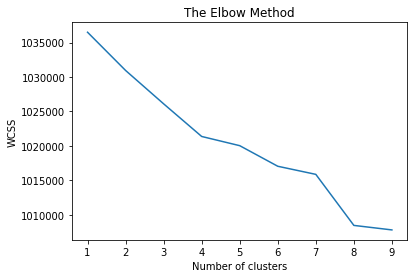

In [0]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=50,n_init=10,random_state=0)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [0]:
print(words[250:300])

['decis', 'declar', 'defenc', 'defend', 'delay', 'deliv', 'demand', 'deni', 'despit', 'destroy', 'detent', 'develop', 'die', 'director', 'disabl', 'disast', 'discuss', 'diseas', 'dismiss', 'disput', 'doctor', 'dog', 'dollar', 'domest', 'donald', 'donat', 'doubl', 'doubt', 'draw', 'dri', 'drink', 'drive', 'driver', 'drop', 'drought', 'drown', 'drug', 'drum', 'dump', 'dure', 'e', 'eagl', 'earli', 'eas', 'east', 'econom', 'economi', 'edg', 'educ', 'effort']


In [0]:
#3 Clusters
kmeans = KMeans(n_clusters = 3, n_init = 20, n_jobs = 1) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans.fit(X3)
# We look at 3 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : man, charg, murder, court, face, jail, assault, stab, die, death, drug, guilti, child, sex, accus, attack, woman, crash, arrest, car, kill, miss, sydney, alleg, plead
1 : polic, investig, probe, man, search, offic, hunt, miss, arrest, death, car, shoot, drug, seek, attack, assault, say, murder, crash, charg, driver, suspect, fatal, raid, station
2 : new, say, plan, win, council, govt, australia, report, kill, fund, urg, court, warn, water, australian, nsw, open, chang, year, qld, interview, wa, death, face, crash


In [0]:
#5 Clusters
kmeans = KMeans(n_clusters = 5, n_init = 20, n_jobs = 1)
kmeans.fit(X3)
# We look at 5 clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : say, polic, need, govt, plan, minist, mp, expert, union, council, public, australia, labor, report, group, opposit, wont, govern, new, chang, pm, health, time, wa, mayor
1 : man, charg, murder, court, face, jail, assault, stab, die, drug, death, guilti, child, sex, accus, attack, woman, crash, arrest, car, kill, miss, sydney, alleg, plead
2 : new, plan, council, govt, australia, report, kill, urg, warn, court, fund, water, nsw, australian, interview, chang, year, qld, death, crash, face, wa, claim, attack, hit
3 : polic, investig, probe, man, search, offic, hunt, miss, arrest, car, death, shoot, drug, seek, attack, assault, charg, murder, crash, driver, suspect, fatal, raid, station, warn
4 : win, open, australian, cup, award, titl, lead, final, new, gold, world, stage, aussi, tour, elect, french, australia, centr, second, claim, set, seri, day, m, round


In [0]:
#6 Clusters
kmeans = KMeans(n_clusters = 6, n_init = 20, n_jobs = 1)
kmeans.fit(X3)
# We look at 6 clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : new, man, say, plan, council, govt, charg, urg, court, murder, fund, jail, water, face, accus, hospit, consid, die, law, qld, hous, nsw, chang, stab, year
1 : kill, attack, man, crash, bomb, blast, iraq, soldier, car, woman, afghan, jail, pakistan, suicid, accid, shark, charg, bus, dog, injur, iraqi, afghanistan, court, isra, strike
2 : australia, world, final, cup, day, grand, south, record, v, semi, new, say, open, cricket, reach, set, test, india, beat, england, rugbi, make, face, lead, leagu
3 : court, charg, report, warn, australian, interview, face, death, water, fund, nsw, urg, open, year, crash, chang, sydney, wa, qld, hit, claim, hous, health, set, hospit
4 : win, award, cup, titl, open, gold, stage, tour, world, final, elect, lead, aussi, seri, claim, australia, second, australian, big, grand, england, m, battl, race, record
5 : polic, investig, man, probe, search, offic, hunt, miss, arrest, death, car, charg, shoot, drug, seek, assault, murder, attack, crash, say, driver

In [0]:
#8 Clusters
kmeans = KMeans(n_clusters = 8, n_init = 20, n_jobs = 1)
kmeans.fit(X3)

# We look at 8 clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : say, plan, council, govt, charg, court, warn, australian, water, urg, fund, face, nsw, interview, death, open, chang, sydney, year, wa, claim, hit, crash, hous, attack
1 : new, win, zealand, open, year, law, award, plan, cup, titl, gold, council, elect, world, set, home, hope, stage, australian, lead, england, hospit, centr, record, tour
2 : man, charg, jail, murder, court, polic, die, stab, face, arrest, miss, assault, accus, death, guilti, kill, attack, car, crash, child, shoot, sydney, sex, plead, search
3 : report, kill, crash, bomb, blast, iraq, attack, rural, soldier, car, afghan, pakistan, suicid, say, accid, releas, bus, woman, afghanistan, china, iraqi, strike, isra, plane, rebel
4 : polic, investig, probe, offic, search, hunt, death, car, drug, arrest, miss, shoot, charg, seek, driver, attack, crash, say, murder, assault, suspect, fatal, raid, warn, station
5 : australia, day, south, v, cup, world, test, india, say, new, cricket, win, china, england, ash, post, western, l

In [0]:
#print(kmeans.cluster_centers_.argsort())
#0- finance/ insurance/central schemes
#1- crime
#2- rule / regulations / ban
#3- sport/ cricket
#4- court hearings
#5- crime
#6- local(city) affairs / development 
#7- police/investigation/ 

#labels = "cluster - " + (labels.tolist())

labels = kmeans.predict(X3)
# Centroid values
centroids = kmeans.cluster_centers_



In [0]:
df=data.copy()
df['Clusters'] = labels
print(df[df.Clusters == 0])
#print(kmeans.cluster_centers_.argsort())
#0- global
#1- crime- law breach *charge
#2- rule / regulations /ban * ban
#3- interviews *
#4- court hearings/ decisions * 
#5- death *
#6- local developments by councils * councils
#7- police/investigation/ * police


                                             headline_text  Clusters
0        aba decides against community broadcasting lic...         0
1           act fire witnesses must be aware of defamation         0
2           a g calls for infrastructure protection summit         0
3                 air nz staff in aust strike for pay rise         0
4            air nz strike to affect australian travellers         0
6               antic delighted with record breaking barca         0
7        aussie qualifier stosur wastes four memphis match         0
8             aust addresses un security council over iraq         0
11       barca take record as robson celebrates birthda...         0
12                              bathhouse plans move ahead         0
13           big hopes for launceston cycling championship         0
14                  big plan to boost paroo water supplies         0
15                  blizzard buries united states in bills         0
17          british combat troops 

In [0]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
k = 8
tfs_reduced = TruncatedSVD(n_components=8, random_state=0).fit_transform(X3)
tfs_embedded = TSNE(n_components=2, n_iter=250,perplexity=40, verbose=2).fit_transform(tfs_reduced)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1076219 samples in 8.053s...
[t-SNE] Computed neighbors for 1076219 samples in 1131.554s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1076219
[t-SNE] Computed conditional probabilities for sample 2000 / 1076219
[t-SNE] Computed conditional probabilities for sample 3000 / 1076219
[t-SNE] Computed conditional probabilities for sample 4000 / 1076219
[t-SNE] Computed conditional probabilities for sample 5000 / 1076219
[t-SNE] Computed conditional probabilities for sample 6000 / 1076219
[t-SNE] Computed conditional probabilities for sample 7000 / 1076219
[t-SNE] Computed conditional probabilities for sample 8000 / 1076219
[t-SNE] Computed conditional probabilities for sample 9000 / 1076219
[t-SNE] Computed conditional probabilities for sample 10000 / 1076219
[t-SNE] Computed conditional probabilities for sample 11000 / 1076219
[t-SNE] Computed conditional probabilities for sample 12000 / 1076219
[t-SNE] Computed c

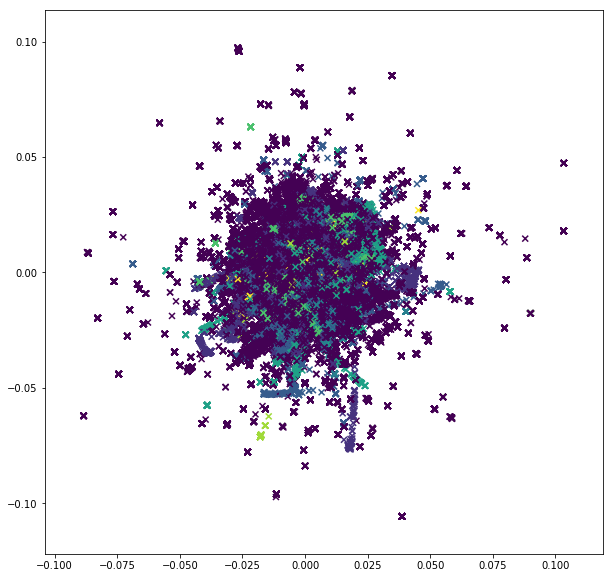

In [0]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes()
plt.scatter(tfs_embedded[:, 0], tfs_embedded[:, 1], marker = "x", c = labels)
plt.show()